## Installation

`pip install scikit-learn`


####  **Loading Datasets**

Accessing SKLearn Datasets

In [1]:
# import libraries
from sklearn.datasets import fetch_california_housing

# load dataset
housing = fetch_california_housing()

In [2]:
# dataset attributes can be accessed by using "housing.key" syntax
# ex. housing.data

# check the keys
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [3]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

#### **Visualize data with pandas**

In [4]:
#convert dataset to pandas dataframe 
import pandas as pd

housing_features = pd.DataFrame(housing.data, columns = housing.feature_names)
housing_target = pd.DataFrame(housing.target, columns = housing.target_names)

In [5]:
#first five rows of features dataframe
housing_features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
#last five rows of target dataframe
housing_target.tail()

,MedHouseVal
20635,0.781
20636,0.771
20637,0.923
20638,0.847
20639,0.894


#### **Splitting the dataset**

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    housing_features, housing_target, test_size = 0.2, random_state=17)

In [8]:
x_test.shape

(4128, 8)

#### **Preprocessing the Data**

Use scaling on the features.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

x_train[0]

array([-0.39246695, -0.36951118, -0.30697974, -0.15641875,  0.75335057,
       -0.04151475,  0.60672192, -1.08718874])

#### **Train the Model**

In [10]:
# regression models

# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [31]:
#load model
model = LinearRegression()

#fit/train model
model.fit(x_train, y_train)

#make predictions (0:malignant, 1:benign)
predictions = model.predict(x_test)

predictions

array([[2.88043644],
       [0.96921103],
       [1.43158959],
       ...,
       [1.92963008],
       [2.78231091],
       [1.29594526]])

In [14]:
predictions

array([[2.88043644],
       [0.96921103],
       [1.43158959],
       ...,
       [1.92963008],
       [2.78231091],
       [1.29594526]])

#### **Evaluate the model**

In [25]:
from sklearn.metrics import r2_score

print(r2_score(y_test, predictions))

0.6027364496734411


#### **Model Persistence / Saving and reloading the model**

In [29]:
import joblib

joblib.dump(model, '../models/linear_reg_model.joblib')

['../models/linear_reg_model.joblib']

In [30]:
model = joblib.load('../models/linear_reg_model.joblib')

model

LinearRegression()

#### **Classification Example**

#### **Load dataset**

In [32]:
redwine_x = pd.read_csv("../datasets/redwine_x.csv")
redwine_y = pd.read_csv("../datasets/redwine_y.csv")

In [33]:
redwine_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.690265,0.157534,0.49,0.116438,0.111853,0.366197,0.222615,0.685022,0.299213,0.251497,0.307692
1,0.185841,0.431507,0.01,0.102740,0.110184,0.225352,0.091873,0.398678,0.637795,0.167665,0.676923
2,0.176991,0.349315,0.00,0.232877,0.135225,0.704225,0.252650,0.404552,0.362205,0.071856,0.169231
3,0.566372,0.123288,0.58,0.082192,0.070117,0.084507,0.045936,0.582232,0.448819,0.329341,0.323077
4,0.336283,0.428082,0.11,0.068493,0.130217,0.211268,0.201413,0.472100,0.354331,0.293413,0.184615


In [34]:
redwine_y.tail()

,label
1066,6
1067,6
1068,5
1069,7
1070,6


#### **Split the dataset**

In [35]:
x_train, x_test, y_train, y_test = train_test_split(
    redwine_x, redwine_y, test_size = 0.2, random_state=17)

#### **Train the model**

In [36]:
#classification models

from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import LogisticRegression

In [40]:
# Fitting the DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(random_state=10).fit(x_train, y_train)

#### **Evaluating the performance of the model using F1-score**

In [42]:
from sklearn.metrics import accuracy_score, f1_score

dtree_predictions = dtree_model.predict(x_test)

print("Initial F1 score: {}".format(f1_score(y_test, dtree_predictions, average="macro")))

Initial F1 score: 0.2965068284440013


The initial F1 score of the model without feature selection/engineering and hypertuning is around **`0.29`**.

#### **Saving the model**

In [43]:
import joblib

joblib.dump(model, '../models/dtree_model.joblib')

['../models/dtree_model.joblib']

#### **Feature Selection, Engineering and Hyperparameter Tuning**

#### **A. Normalization**

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

redwine_x = pd.read_csv("../datasets/redwine_x.csv")
redwine_y = pd.read_csv("../datasets/redwine_y.csv")

x = pd.concat([redwine_x, redwine_y['label']], axis=1)
x['label'] = x['label'].astype('float')

# Min-max Normalization
x_normalized = (x - x.min()) / (x.max() - x.min())
x_normalized

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
0,0.690265,0.190083,0.49,0.116438,0.111853,0.388060,0.222615,0.685022,0.299213,0.233129,0.307692,0.6
1,0.185841,0.520661,0.01,0.102740,0.110184,0.238806,0.091873,0.398678,0.637795,0.147239,0.676923,0.6
2,0.176991,0.421488,0.00,0.232877,0.135225,0.746269,0.252650,0.404552,0.362205,0.049080,0.169231,0.4
3,0.566372,0.148760,0.58,0.082192,0.070117,0.089552,0.045936,0.582232,0.448819,0.312883,0.323077,0.8
4,0.336283,0.516529,0.11,0.068493,0.130217,0.223881,0.201413,0.472100,0.354331,0.276074,0.184615,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1066,0.398230,0.396694,0.00,0.068493,0.076795,0.059701,0.014134,0.560206,0.346457,0.159509,0.307692,0.6
1067,0.318584,0.425620,0.10,0.082192,0.101836,0.358209,0.190813,0.463289,0.433071,0.233129,0.384615,0.6
1068,0.230088,0.413223,0.06,0.123288,0.108514,0.208955,0.279152,0.542584,0.606299,0.104294,0.169231,0.4
1069,0.292035,0.066116,0.35,0.054795,0.070117,0.089552,0.031802,0.331131,0.456693,0.263804,0.538462,0.8


The values of every feature is now scaled **`between 0 and 1`**.

#### **B. Feature Selection**

#### **Correlation heatmap**

<AxesSubplot: >

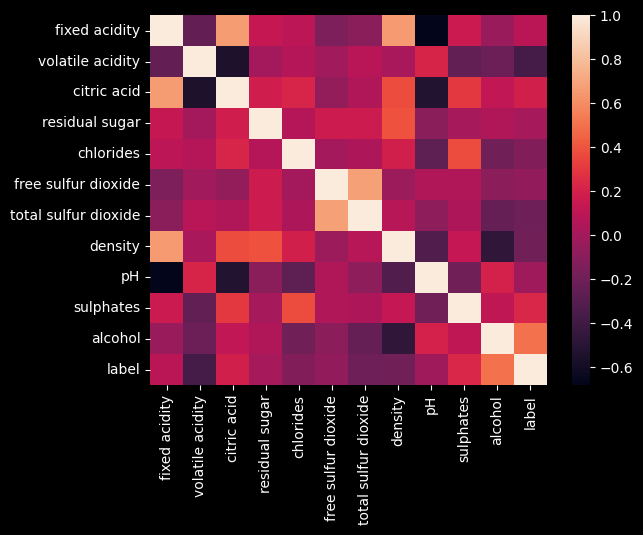

In [46]:
sns.heatmap(x_normalized.corr())

#### **Dropping some features**

In [47]:
drop_features = ["citric acid", "density", "free sulfur dioxide"]

redwine_df = redwine_x.copy()
redwine_x_fs = redwine_df.drop(drop_features, axis=1)

redwine_x_fs

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol
0,0.690265,0.157534,0.116438,0.111853,0.222615,0.299213,0.251497,0.307692
1,0.185841,0.431507,0.102740,0.110184,0.091873,0.637795,0.167665,0.676923
2,0.176991,0.349315,0.232877,0.135225,0.252650,0.362205,0.071856,0.169231
3,0.566372,0.123288,0.082192,0.070117,0.045936,0.448819,0.329341,0.323077
4,0.336283,0.428082,0.068493,0.130217,0.201413,0.354331,0.293413,0.184615
...,...,...,...,...,...,...,...,...
1066,0.398230,0.328767,0.068493,0.076795,0.014134,0.346457,0.179641,0.307692
1067,0.318584,0.352740,0.082192,0.101836,0.190813,0.433071,0.251497,0.384615
1068,0.230088,0.342466,0.123288,0.108514,0.279152,0.606299,0.125749,0.169231
1069,0.292035,0.054795,0.054795,0.070117,0.031802,0.456693,0.281437,0.538462


#### **Checking the F1-score of the new dataset**

In [49]:
redwine_y = pd.read_csv("../datasets/redwine_y.csv")

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(redwine_x_fs, redwine_y['label'], test_size=0.2, random_state=0)

dtree_model_1 = DecisionTreeClassifier(random_state=0).fit(x_train_1, y_train_1)
dtree_predictions_1 = dtree_model_1.predict(x_test_1)

print("Initial F1 score: {}".format(f1_score(y_test, dtree_predictions, average="macro")))
print("New F1 score: {}".format(f1_score(y_test_1, dtree_predictions_1, average="macro")))

Initial F1 score: 0.2965068284440013
New F1 score: 0.35668385633823424


Our new model's **f1-score** is **`6%`** higher than our previous model.

#### **C. Hyperparameter tuning**

In [50]:
from sklearn.model_selection import GridSearchCV

parameters ={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
     'criterion' : ['gini', 'entropy'],
     'max_features': [0.3,0.5,0.7,0.9],
     'min_samples_leaf': [3,5,7,10,15],
     'min_samples_split': [2,5,10]}


grid_search = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(
    grid_search, 
    parameters, 
    cv=5,
    scoring='accuracy',n_jobs=-1)

grid_result= grid_search.fit(x_train_1, y_train_1)
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 0.9, 'min_samples_leaf': 15, 'min_samples_split': 2}
Best Score:  0.5969808241534068


Making new predictions based on the given parameters:

In [51]:
dtree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, max_features = 0.9, min_samples_leaf = 15, min_samples_split = 2, random_state=0).fit(x_train, y_train)
dtree_predictions = dtree_model.predict(x_test)

dtree_model_1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, max_features = 0.9, min_samples_leaf = 15, min_samples_split = 2, random_state=0).fit(x_train_1, y_train_1)
dtree_predictions_1 = dtree_model_1.predict(x_test_1)

print("Initial F1 score: {}".format(f1_score(y_test, dtree_predictions, average="macro")))
print("New F1 score: {}".format(f1_score(y_test_1, dtree_predictions_1, average="macro")))

Initial F1 score: 0.2746346843121037
New F1 score: 0.3444046604148906


Checking other metrics:

In [52]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

print('Old accuracy scores:{}'.format(accuracy_score(y_test, dtree_predictions)))
print('New accuracy scores:{}\n'.format(accuracy_score(y_test, dtree_predictions_1)))

print("Old f1 score: {}".format(f1_score(y_test, dtree_predictions, average="macro")))
print("New f1 score: {}\n".format(f1_score(y_test_1, dtree_predictions_1, average="macro")))

print('Old precision scores:{}'.format(precision_score(y_test, dtree_predictions, average="macro", zero_division=0)))
print('New precision scores:{}\n'.format(precision_score(y_test, dtree_predictions_1, average="macro", zero_division=0)))

print("Old recall score: {}".format(recall_score(y_test, dtree_predictions, average="macro", zero_division=0)))
print("New recall score: {}\n".format(recall_score(y_test_1, dtree_predictions_1, average="macro", zero_division=0)))

Old accuracy scores:0.6046511627906976
New accuracy scores:0.3488372093023256

Old f1 score: 0.2746346843121037
New f1 score: 0.3444046604148906

Old precision scores:0.2692982456140351
New precision scores:0.12631687667837224

Old recall score: 0.28132598939208486
New recall score: 0.3382446500867554



#### **End. Thank you!**